# Performance analysis

In [1]:
import numpy as np
import pathlib

import pathlib
import json
import numpy as np
import time
import seaborn as sns;
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

sns.set()

def flatten_metrics(metrics):
    flattened = {}
    flattened["CoLA"] = {
        "metric": "Matthews correlation",
        "mean": metrics['CoLA']['mcc'][0],
        "stdv": metrics['CoLA']['mcc'][1]
    }
    flattened["MNLI-mm"] = {
        "metric": "Accuracy",
        "mean": metrics["MNLI"]["mnli-mm_acc"][0],
        "stdv": metrics["MNLI"]["mnli-mm_acc"][1]
    }
    
    flattened["MNLI"] = {
        "metric": "Accuracy",
        "mean": metrics["MNLI"]["mnli_acc"][0],
        "stdv": metrics["MNLI"]["mnli_acc"][1]
    }
    flattened["MNLI-mm"] = {
        "metric": "Accuracy",
        "mean": metrics["MNLI"]["mnli-mm_acc"][0],
        "stdv": metrics["MNLI"]["mnli-mm_acc"][1]
    }
    flattened["MRPC"] = {
        "metric": "Accuracy",
        "mean": metrics["MRPC"]["acc"][0],
        "stdv": metrics["MRPC"]["acc"][1]
    }
    flattened["QNLI"] = {
        "metric": "Accuracy",
        "mean": metrics["QNLI"]["acc"][0],
        "stdv": metrics["QNLI"]["acc"][1]
    }
    flattened["QQP"] = {
        "metric": "Accuracy",
        "mean": metrics["QQP"]["acc"][0],
        "stdv": metrics["QQP"]["acc"][1]
    }
    flattened["RTE"] = {
        "metric": "Accuracy",
        "mean": metrics["RTE"]["acc"][0],
        "stdv": metrics["RTE"]["acc"][1]
    }
    flattened["SST-2"] = {
        "metric": "Accuracy",
        "mean": metrics["SST-2"]["acc"][0],
        "stdv": metrics["SST-2"]["acc"][1]
    }
    flattened["STS-B"] = {
        "metric": "Pearson correlation",
        "mean": metrics["STS-B"]["pearson"][0],
        "stdv": metrics["STS-B"]["pearson"][1]
    }
    flattened["WNLI"] = {
        "metric": "Accuracy",
        "mean": metrics["WNLI"]["acc"][0],
        "stdv": metrics["WNLI"]["acc"][1]
    }
    return flattened


def plot_all_task_metrics(metrics, save_path):
    all_tasks = sorted(metrics[0][1].keys())
    experiment_metrics = [(name, flatten_metrics(metrics)) for name, metrics in metrics]
    experiment_names = [e_m[0] for e_m in experiment_metrics]
    metrics_data = [e_m[1] for e_m in experiment_metrics]
    x_pos = np.arange(len(experiment_names))
    
    fig, axs = plt.subplots(3, 3, figsize=(9,9))

    # Get a color map
    my_cmap = sns.color_palette("Paired")
    patterns = [ "||" , "\\\\" , "//" , "xx" , "--", "||--"]
    
    for i, task in enumerate(all_tasks):
        means = [m[task]["mean"] for m in metrics_data]
        errors = [m[task]["stdv"] for m in metrics_data]
        row = i // 3
        col = i % 3
        axs[row, col].bar(x_pos, means, yerr=errors, align='center', color=my_cmap)#my_cmap(my_norm(range(len(x_pos)))))   
        axs[row, col].set_ylabel(metrics_data[0][task]["metric"])
        axs[row, col].set_title(f"{task}")
        axs[row, col].set_xticks([])
        
        bars = axs[row, col].patches
        
        for bar, hatch in zip(bars, patterns):  # loop over bars and hatches to set hatches in correct order
            bar.set_hatch(hatch)
    legend_elements = [Patch(facecolor=my_cmap[i], hatch=patterns[i], label=exp) for i, exp in enumerate(experiment_names)]
    legend = plt.legend(legend_elements, experiment_names, loc='best', ncol=3, bbox_to_anchor=(0.5, -0.1), labelspacing=1.5, handlelength=4)
    for patch in legend.get_patches():
        patch.set_height(10)
        patch.set_y(-1)
    plt.subplots_adjust(right=1.5)
    fig.tight_layout()
    plt.show()
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

In [2]:
evaluation_dir = pathlib.Path("../evaluate_masked")
name_path = {
    "majority baseline": evaluation_dir / "freq_baseline" / "results.json",
    "full model": evaluation_dir / "original_without_any_mask" / "baseline" / "results.json",
    "good sub-network (pruned)": evaluation_dir / "original_with_mlp_mask_head_mask_together" / "baseline" / "results.json",
    "bad sub-network (pruned)": evaluation_dir / "original_with_mlp_mask_head_mask_together_bad_exact" / "baseline" / "results.json",
    "good sub-network (retrained)": evaluation_dir / "retrain_with_mlp_mask_head_mask_together" / "baseline" / "results.json",
    "bad sub-network (retrained)": evaluation_dir / "retrain_with_mlp_mask_head_mask_together_bad" / "baseline" / "results.json",
}

analyzed_metrics = []
for name, path in name_path.items():
    with path.open() as f:
        metrics = json.load(f)
    analyzed_metrics.append((name, metrics))

/home/sai/miniconda3/envs/bertexp/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


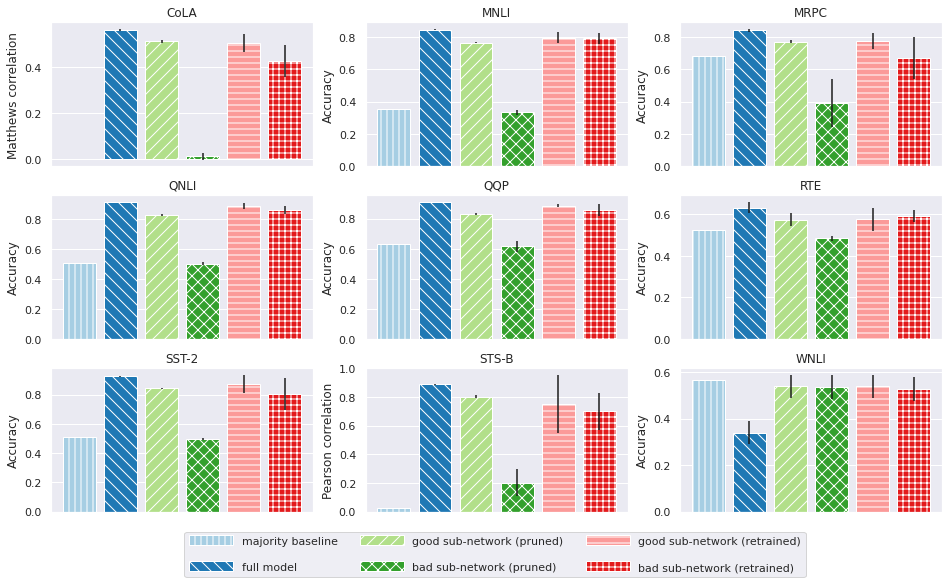

In [3]:
plot_all_task_metrics(analyzed_metrics, "evaluation/tasks_evaluation.pdf")